In [1]:
from julia.api import Julia
import os
os.environ["JULIA_NUM_THREADS"] = "4"
jl = Julia(compiled_modules=False)

In [2]:
jl.eval('include("trash.jl")')
result = jl.eval('func()')

print(result)

Number of threads: 4
[1 2 3 4 5]


In [29]:
jl.eval('include("plot_all.jl")')
Svd_time, LSQR_seq, LSQR_par = jl.eval('plot_all()')

print(Svd_time)
print(LSQR_seq)
print(LSQR_par)


SVD entered
[{'dim': (90, 50), 'time': 0.007645743}, {'dim': (95, 55), 'time': 0.007457364}, {'dim': (100, 60), 'time': 0.008976436}, {'dim': (105, 65), 'time': 0.00964548}]
[{'dim': (90, 50), 'time': 16.192967758}, {'dim': (95, 55), 'time': 21.692706081}, {'dim': (100, 60), 'time': 18.165093294}, {'dim': (105, 65), 'time': 23.949426848}]
[]
SVD entered
SVD entered
SVD entered


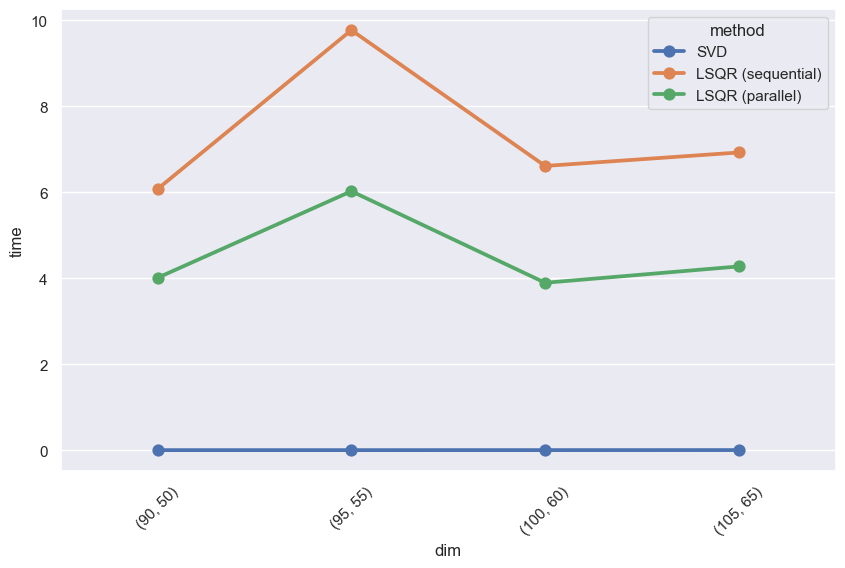

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# # Your data
# data1 = [{'dim': (90, 50), 'time': 0.007954164}, {'dim': (95, 55), 'time': 0.008038622}, {'dim': (100, 60), 'time': 0.008534033}, {'dim': (105, 65), 'time': 0.009281944}]
# data2 = [{'dim': (90, 50), 'time': 6.077339817}, {'dim': (95, 55), 'time': 9.769454199}, {'dim': (100, 60), 'time': 6.612801607}, {'dim': (105, 65), 'time': 6.926171987}]
# data3 = [{'dim': (90, 50), 'time': 4.013967412}, {'dim': (95, 55), 'time': 6.025712728}, {'dim': (100, 60), 'time': 3.897401388}, {'dim': (105, 65), 'time': 4.277641491}]

# Convert to DataFrames
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)
df3 = pd.DataFrame(data3)

# Add a 'method' column to distinguish the data sources
df1['method'] = 'SVD'
df2['method'] = 'LSQR (sequential)'
df3['method'] = 'LSQR (parallel)'

# Concatenate the dataframes
df = pd.concat([df1, df2, df3])

# Convert 'dim' to string so it can be used as a categorical variable
df['dim'] = df['dim'].astype(str)

# Create the plot
plt.figure(figsize=(10, 6))
sns.pointplot(data=df, x='dim', y='time', hue='method', palette='deep')
plt.xticks(rotation=45)
plt.show()